In [156]:
pip install numpy pandas sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [157]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [158]:
mnist = fetch_openml('mnist_784')

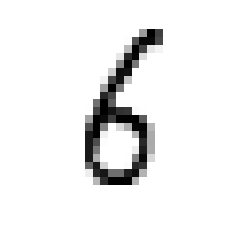

In [159]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36002]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()


In [160]:
y[36002]

'6'

In [161]:
x_train, x_test = x[0:60000], x[6000:70000]
y_train, y_test = y[0:60000], y[6000:70000]

In [162]:
x_train = np.random.permutation(x_train)
y_train = np.random.permutation(y_train)

In [168]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 6)
y_test_2 = (y_test == 6)

In [169]:
y_train

array([9, 6, 6, ..., 9, 5, 5], dtype=int8)

In [170]:
clf = LogisticRegression(solver='lbfgs', max_iter=60000)


In [171]:
clf.fit(x_train, y_train_2)


LogisticRegression(max_iter=60000)

In [172]:
clf.predict([some_digit])

array([False])

In [173]:
# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())


0.9007333333333333
